<a href="https://colab.research.google.com/github/tuminzee/PredictCovid/blob/cnn-model-changes/Covid_19_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Extracting dataset from drive
!unrar x '/content/drive/My Drive/Covid 19 detection using Deep Learning/Datasets/DemoDataset.rar' '/content/DemoDataset/'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/Covid 19 detection using Deep Learning/Datasets/DemoDataset.rar

Creating    /content/DemoDataset                                      OK
Creating    /content/DemoDataset/Train                                OK
Creating    /content/DemoDataset/Train/Covid                          OK
Extracting  /content/DemoDataset/Train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg       0%  OK 
Extracting  /content/DemoDataset/Train/Covid/1-s2.0-S0140673620303706-fx1_lrg.jpg       0%  OK 
Extracting  /content/DemoDataset/Train/Covid/1-s2.0-S1684118220300608-main.pdf-001.jpg       0%  OK 
Extracting  /content/DemoDataset/Train/Covid/1-s2.0-S1684118220300608-main.pdf-002.jpg       0%  OK 
Extracting  /content/DemoDataset/Train/Covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png       0%  OK 
Extracting  /content/DemoDataset/Train/Covid/1-s2.0-S168411

In [ ]:
#alloting paths for train and test data
train_path = '/content/DemoDataset/Train'
val_path = '/content/DemoDataset/Val'

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import *

In [ ]:
#building the CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

#compiling the model with binary loss function
model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
#printing the summary of the network
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 30, 64)       

In [ ]:
#generating train image data with real-time data augmentation
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
#identifying image classes automatically
train_generator = train_datagen.flow_from_directory(
    '/content/DemoDataset/Train',
    target_size = (128,128),
    batch_size = 16,
    class_mode = 'binary')

Found 328 images belonging to 2 classes.


In [ ]:
#labeling the identified classes
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
#identifying test data classes
validation_generator = test_dataset.flow_from_directory(
    '/content/DemoDataset/Val',
    target_size = (128,128),
    batch_size = 16,
    class_mode = 'binary')

Found 80 images belonging to 2 classes.


In [ ]:
#callback to save model periodically
my_callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='/content/model.{epoch:02d}-{val_loss:.2f}.hdf5')
]

In [ ]:
#configuring model for training
hist = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps=5,
    callbacks=my_callbacks,
    shuffle=True
)

Epoch 1/100
20/20 [==============================] - 11s 539ms/step - loss: 0.6875 - accuracy: 0.5801 - val_loss: 0.6845 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 11s 529ms/step - loss: 0.6085 - accuracy: 0.6987 - val_loss: 0.5892 - val_accuracy: 0.9125
Epoch 3/100
20/20 [==============================] - 10s 507ms/step - loss: 0.3416 - accuracy: 0.8590 - val_loss: 0.2490 - val_accuracy: 0.9875
Epoch 4/100
20/20 [==============================] - 11s 526ms/step - loss: 0.3384 - accuracy: 0.8782 - val_loss: 0.3309 - val_accuracy: 0.9500
Epoch 5/100
20/20 [==============================] - 10s 511ms/step - loss: 0.3414 - accuracy: 0.8814 - val_loss: 0.2384 - val_accuracy: 0.9750
Epoch 6/100
20/20 [==============================] - 10s 517ms/step - loss: 0.2479 - accuracy: 0.9071 - val_loss: 0.2118 - val_accuracy: 0.9875
Epoch 7/100
20/20 [==============================] - 10s 521ms/step - loss: 0.2186 - accuracy: 0.9359 - val_loss: 0.1762 - val_accuracy:

#Finding the Optimal Model(based on CM)


In [ ]:
from sklearn.metrics import confusion_matrix
from pathlib import Path
import os

mod = []
paths = Path('/content').glob('**/*.hdf5')
#iterating through saved models
for path in paths:
  model = load_model(str(path))
  
  y_actual = []
  y_test = []

  #predicting normal class
  for i in os.listdir('/content/DemoDataset/Val/Normal/'):
    img = image.load_img('/content/DemoDataset/Val/Normal/'+i,target_size=(128,128))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    if p[0,0]==1:
      y_test.append('Normal')
    else:
      y_test.append('Covid')
    y_actual.append('Normal')

  #predicting covid class
  for i in os.listdir('/content/DemoDataset/Val/Covid/'):
    img = image.load_img('/content/DemoDataset/Val/Covid/'+i,target_size=(128,128))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    if p[0,0]==1:
      y_test.append('Normal')
    else:
      y_test.append('Covid')
    y_actual.append('Covid')

  #saving results in form of numpy array
  y_actual = np.array(y_actual)
  y_test = np.array(y_test)

  #generating confusion matrix
  cm = confusion_matrix(y_actual, y_test)

  #selecting models with good results
  fp = int(cm[0][1])
  fn = int(cm[1][0])
  if fp<=2 and fn<=2:
    mod.append(path)
    print(cm)
    print(path)

#Evaluating selected model

In [ ]:
model = load_model('/content/model.26-0.11.hdf5')

In [ ]:
model.evaluate(train_generator)

21/21 [==============================] - 9s 423ms/step - loss: 0.1071 - accuracy: 0.9787


[0.10713795572519302, 0.9786585569381714]

In [ ]:
model.evaluate(validation_generator)

5/5 [==============================] - 1s 260ms/step - loss: 0.1144 - accuracy: 0.9750


[0.11440887302160263, 0.9750000238418579]

#Confusion Matrix

In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
y_actual = []
y_test = []
threshold=0.5

In [ ]:
for i in os.listdir('/content/DemoDataset/Val/Normal/'):
  img = image.load_img('/content/DemoDataset/Val/Normal/'+i,target_size=(128,128))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  if p[0,0]==1:
    y_test.append('Normal')
  else:
    y_test.append('Covid')
  y_actual.append('Normal')
print(y_test)

['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Covid', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal']


In [ ]:
for i in os.listdir('/content/DemoDataset/Val/Covid/'):
  img = image.load_img('/content/DemoDataset/Val/Covid/'+i,target_size=(128,128))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  if p[0,0]==1:
    y_test.append('Normal')
  else:
    y_test.append('Covid')
  y_actual.append('Covid')
print(y_test[40:])

['Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Normal', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid']


In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)


In [ ]:
cm = confusion_matrix(y_actual, y_test)

In [ ]:
import seaborn as sns

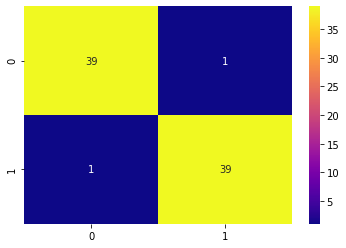

In [ ]:
#displaying the confusion matrix
sns.heatmap(cm, cmap="plasma", annot=True)

#TESTING


In [ ]:
from keras.models import load_model
import cv2
import numpy as np

In [ ]:
#loading the model
model = load_model('/content/drive/My Drive/MODEL and JSON/model_demo-07-10.hdf5')

In [ ]:
#compiling the saved model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#uploading and pre-processing of image for testing
img = cv2.imread('/content/1.jpg')
img = cv2.resize(img,(128,128))
img = np.reshape(img,[1,128,128,3])
img = np.array(img, dtype=np.float64)
print(type(img))

<class 'numpy.ndarray'>


In [ ]:
#predicting the uploaded image
prediction = model.predict_classes(img)
prob = model.predict_proba(img)

In [ ]:
#printing the predicted class and probability of uploaded image
if prediction[0,0] == 0:
  print("Covid-19")
  print(f'Accuracy : {(1-prob[0,0])*100}%')
else:
  print("Normal")
  print("Accuracy : {:.2f}".format((prob[0,0])*100),"%")

Covid-19
Accuracy : 99.96366166160442%
